# MAT-classification: Analysis and Classification methods for Multiple Aspect Trajectory Data Mining \[MAT-Tools Framework\]

Sample Code in python notebook to use mat-classification as a python library.

The present package offers a tool, to support the user in the task of data analysis of multiple aspect trajectories. It integrates into a unique framework for multiple aspects trajectories and in general for multidimensional sequence data mining methods.

Created on Dec, 2023
Copyright (C) 2023, License GPL Version 3 or superior (see LICENSE file)

In [5]:
!pip3 install mat-classification

## 1. Loading data
To use helpers for data pre-processing, import from package `matdata` (dependency: [mat-data](https://github.com/ttportela/mat-data)):

### 1.1. Loading a sample data
    a) Lets start by loading FoursquareNYC data:
(For other preprocessing functions, check the docs: https://mat-analysis.github.io/mat-tools/

In [21]:
from matdata.dataset import load_ds

dataset='mat.FoursquareNYC'

data = load_ds(dataset, missing='-999')
data

Loading dataset file: https://github.com/mat-analysis/datasets/tree/main/mat/FoursquareNYC/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1055k  100 1055k    0     0   623k      0  0:00:01  0:00:01 --:--:--  625k


,space,time,day,poi,type,root_type,rating,weather,tid,label
0,40.8331652006224 -73.9418603427692,317,Monday,The Lair Of Modern Strange Cowboy,Home (private),Residence,-1.0,Clear,126,6
1,40.8340978041072 -73.9452672225881,1404,Monday,Galaxy Gourmet Deli,Deli / Bodega,Food,8.2,Clouds,126,6
2,40.8331652006224 -73.9418603427692,0,Tuesday,The Lair Of Modern Strange Cowboy,Home (private),Residence,-1.0,Clouds,126,6
3,40.7646959283254 -73.8851974964414,1069,Thursday,Popeyes Louisiana Kitchen,Fried Chicken Joint,Food,6.6,Clear,126,6
4,40.7660790376824 -73.8835287094116,1120,Thursday,MTA Bus Operations Depot - LaGuardia,Bus Station,Travel & Transport,-1.0,Clear,126,6
...,...,...,...,...,...,...,...,...,...,...
66941,40.7047332789043 -73.9877378940582,1037,Friday,Miami Ad School Brooklyn,General College & University,College & University,-1.0,Clouds,29563,1070
66942,40.6951627360199 -73.9954478691072,1210,Friday,Lantern Thai Kitchen,Thai Restaurant,Food,8.0,Clouds,29563,1070
66943,40.6978026652822 -73.9941451630314,481,Saturday,Eastern Athletic Club,Gym,Outdoors & Recreation,6.9,Clouds,29563,1070
66944,40.6946728967503 -73.9940820360805,819,Saturday,Starbucks,Coffee Shop,Food,7.0,Clouds,29563,1070


In [22]:
from matdata.preprocess import klabels_stratify
train, test = klabels_stratify(data, kl=5)

train.label.unique(), '--', len(train.tid.unique()), len(test.tid.unique())

Spliting Data (class-balanced):   0%|          | 0/5 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/5 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/5 [00:00<?, ?it/s]

(array([ 84, 164, 181, 390, 768]), '--', 56, 28)

### 1.2. Saving and Conversions
    b) Saving trajectories:

In [ ]:
import pandas as pd
train.to_parquet(f'sample/data/{dataset.split(".")[1]}/train.parquet', index=False)
test.to_parquet(f'sample/data/{dataset.split(".")[1]}/test.parquet', index=False)

Also, we can save using the converter functions (which provide more options), in other formats for other input types of methods:

In [ ]:
from matdata.converter import df2csv, df2zip, df2parquet

# Saving as csv:
df2csv(train, f'sample/data/{dataset.split(".")[1]}', 'train')
df2csv(test, f'sample/data/{dataset.split(".")[1]}', 'test')

# Saving as zip (containing trajectory type of files):
df2zip(train, f'sample/data/{dataset.split(".")[1]}', 'train')
df2zip(test, f'sample/data/{dataset.split(".")[1]}', 'test')

# Saving as parquet (override):
df2parquet(train, f'sample/data/{dataset.split(".")[1]}', 'train')
df2parquet(test, f'sample/data/{dataset.split(".")[1]}', 'test')

# Check docs:
help(df2parquet)

Then, experiment with a classifier.

In [25]:
from matdata.preprocess import klabels_stratify
from matdata.converter import df2csv, df2zip, df2parquet

for i in range(1, 6):
    train, test = klabels_stratify(data, kl=2, random_num=i)
    # Saving as csv:
    df2csv(train, f'sample/data/{dataset.split(".")[1]}/run{i}', 'train')
    df2csv(test, f'sample/data/{dataset.split(".")[1]}/run{i}', 'test')

    # Saving as zip (containing trajectory type of files):
    df2zip(train, f'sample/data/{dataset.split(".")[1]}/run{i}', 'train')
    df2zip(test, f'sample/data/{dataset.split(".")[1]}/run{i}', 'test')

    # Saving as parquet (override):
    df2parquet(train, f'sample/data/{dataset.split(".")[1]}/run{i}', 'train')
    df2parquet(test, f'sample/data/{dataset.split(".")[1]}/run{i}', 'test')

Spliting Data (class-balanced):   0%|          | 0/2 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/2 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/2 [00:00<?, ?it/s]

Writing CSV: sample/data/FoursquareNYC/run1/train.csv
Done.
 --------------------------------------------------------------------------------
Writing CSV: sample/data/FoursquareNYC/run1/test.csv
Done.
 --------------------------------------------------------------------------------


Writing ZIP:   0%|          | 0/19 [00:00<?, ?it/s]

Writing ZIP:   0%|          | 0/9 [00:00<?, ?it/s]

Writing Parquet: sample/data/FoursquareNYC/run1/train.parquet
Done.
 --------------------------------------------------------------------------------
Writing Parquet: sample/data/FoursquareNYC/run1/test.parquet
Done.
 --------------------------------------------------------------------------------


Spliting Data (class-balanced):   0%|          | 0/2 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/2 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/2 [00:00<?, ?it/s]

Writing CSV: sample/data/FoursquareNYC/run2/train.csv
Done.
 --------------------------------------------------------------------------------
Writing CSV: sample/data/FoursquareNYC/run2/test.csv
Done.
 --------------------------------------------------------------------------------


Writing ZIP:   0%|          | 0/25 [00:00<?, ?it/s]

Writing ZIP:   0%|          | 0/13 [00:00<?, ?it/s]

Writing Parquet: sample/data/FoursquareNYC/run2/train.parquet
Done.
 --------------------------------------------------------------------------------
Writing Parquet: sample/data/FoursquareNYC/run2/test.parquet
Done.
 --------------------------------------------------------------------------------


Spliting Data (class-balanced):   0%|          | 0/2 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/2 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/2 [00:00<?, ?it/s]

Writing CSV: sample/data/FoursquareNYC/run3/train.csv
Done.
 --------------------------------------------------------------------------------
Writing CSV: sample/data/FoursquareNYC/run3/test.csv
Done.
 --------------------------------------------------------------------------------


Writing ZIP:   0%|          | 0/19 [00:00<?, ?it/s]

Writing ZIP:   0%|          | 0/9 [00:00<?, ?it/s]

Writing Parquet: sample/data/FoursquareNYC/run3/train.parquet
Done.
 --------------------------------------------------------------------------------
Writing Parquet: sample/data/FoursquareNYC/run3/test.parquet
Done.
 --------------------------------------------------------------------------------


Spliting Data (class-balanced):   0%|          | 0/2 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/2 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/2 [00:00<?, ?it/s]

Writing CSV: sample/data/FoursquareNYC/run4/train.csv
Done.
 --------------------------------------------------------------------------------
Writing CSV: sample/data/FoursquareNYC/run4/test.csv
Done.
 --------------------------------------------------------------------------------


Writing ZIP:   0%|          | 0/20 [00:00<?, ?it/s]

Writing ZIP:   0%|          | 0/9 [00:00<?, ?it/s]

Writing Parquet: sample/data/FoursquareNYC/run4/train.parquet
Done.
 --------------------------------------------------------------------------------
Writing Parquet: sample/data/FoursquareNYC/run4/test.parquet
Done.
 --------------------------------------------------------------------------------


Spliting Data (class-balanced):   0%|          | 0/2 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/2 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/2 [00:00<?, ?it/s]

Writing CSV: sample/data/FoursquareNYC/run5/train.csv
Done.
 --------------------------------------------------------------------------------
Writing CSV: sample/data/FoursquareNYC/run5/test.csv
Done.
 --------------------------------------------------------------------------------


Writing ZIP:   0%|          | 0/31 [00:00<?, ?it/s]

Writing ZIP:   0%|          | 0/15 [00:00<?, ?it/s]

Writing Parquet: sample/data/FoursquareNYC/run5/train.parquet
Done.
 --------------------------------------------------------------------------------
Writing Parquet: sample/data/FoursquareNYC/run5/test.parquet
Done.
 --------------------------------------------------------------------------------


## 2. Classification Methods

TODO

- `prepare_input(train, test)` => `model.train()` => `model.test()`
- `model.fit(X_train, y_train, X_val, y_val)` => `model.predict(X_test, y_test)`

### 2.1. Trajectory Based Methods

TODO

#### 2.1.1. MARC

TODO

In [3]:
from matclassification.methods import MARC

model = MARC()
model.prepare_input(train, test)
model.train()
model.test()
## We can visualize the training report (the same on most models):
model.report

2024-06-15 01:02:13.579324

[MARC:] Building model

###########    DATA PREPARATION      ###########
[    INFO    ] 2024-06-15 01:02:13 :: Attribute 'space': 878 unique values
[    INFO    ] 2024-06-15 01:02:13 :: Attribute 'time': 1077 unique values
[    INFO    ] 2024-06-15 01:02:13 :: Attribute 'day': 7 unique values
[    INFO    ] 2024-06-15 01:02:13 :: Attribute 'poi': 772 unique values
[    INFO    ] 2024-06-15 01:02:13 :: Attribute 'type': 220 unique values
[    INFO    ] 2024-06-15 01:02:13 :: Attribute 'root_type': 10 unique values
[    INFO    ] 2024-06-15 01:02:13 :: Attribute 'rating': 51 unique values
[    INFO    ] 2024-06-15 01:02:13 :: Attribute 'weather': 6 unique values
[    INFO    ] 2024-06-15 01:02:13 :: Total of attribute/value pairs: 3021
[[    INFO    ] 2024-06-15 01:02:13 :: Processing trajectory 84/84. 
[    INFO    ] 2024-06-15 01:02:13 :: Loading data from files ... DONE!
[    INFO    ] 2024-06-15 01:02:13 :: Trajectories:  84
[    INFO    ] 2024-06-15 01:0

[MARC:] Model Training:   0%|          | 0/18 [00:00<?, ?it/s]

Metal device set to: Apple M1


2024-06-15 01:02:13.684051: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-15 01:02:13.684157: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


===== Training Epoch 1 =====
Epoch 1/1000


2024-06-15 01:02:14.180014: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-06-15 01:02:15.186906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:02:15.417640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:02:15.683918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 29.2423 - acc: 0.1786 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:02:16.293160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:02:16.376414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:02:16.738702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:02:16.806106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 208ms/step
TRAIN		acc: 0.321429	acc_top5: 1.000000	f1_macro: 0.221908	prec_macro: 0.233745	rec_macro: 0.253084
1/1 [==============================] - 0s 210ms/step
TEST		acc: 0.178571	acc_top5: 1.000000	f1_macro: 0.080000	prec_macro: 0.258824	rec_macro: 0.125000
1/1 [==============================] - 3s 3s/step - loss: 29.2423 - acc: 0.1786 - top_k_categorical_accuracy: 1.0000 - val_loss: 28.6357 - val_acc: 0.1786 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 17ms/stepss: 28.6362 - acc: 0.2500 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.321429	acc_top5: 1.000000	f1_macro: 0.176768	prec_macro: 0.734574	rec_macro: 0.236039
1/1 [==============================] - 0s 24ms/step
TEST		acc: 0.178571	acc_top5: 1.000000	f1_macro: 0.064516	prec_macro: 0.643478	rec_macro: 0.125000
1/1 [==============================] - 0s 250ms/step - loss: 28.6362 - acc: 0.2500 - top_k_cat

2024-06-15 01:02:37.755222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:02:37.968452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:02:38.182431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 33.5580 - acc: 0.3036 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:02:38.772696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:02:38.866727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:02:39.182362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:02:39.261044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 154ms/step
TRAIN		acc: 0.607143	acc_top5: 1.000000	f1_macro: 0.614963	prec_macro: 0.678824	rec_macro: 0.616234
1/1 [==============================] - 0s 163ms/step
TEST		acc: 0.428571	acc_top5: 1.000000	f1_macro: 0.392698	prec_macro: 0.403333	rec_macro: 0.400714
1/1 [==============================] - 3s 3s/step - loss: 33.5580 - acc: 0.3036 - top_k_categorical_accuracy: 1.0000 - val_loss: 32.7636 - val_acc: 0.4286 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 21ms/stepss: 32.7345 - acc: 0.4643 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.839286	acc_top5: 1.000000	f1_macro: 0.811313	prec_macro: 0.883333	rec_macro: 0.787987
1/1 [==============================] - 0s 30ms/step
TEST		acc: 0.535714	acc_top5: 1.000000	f1_macro: 0.462937	prec_macro: 0.469048	rec_macro: 0.482857
1/1 [==============================] - 0s 293ms/step - loss: 32.7345 - acc: 0.4643 - top_k_cat

2024-06-15 01:03:01.610055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:03:01.842871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:03:02.094567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 29.2788 - acc: 0.1964 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:03:02.643994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:03:02.743590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:03:03.104989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:03:03.189948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 223ms/step
TRAIN		acc: 0.267857	acc_top5: 1.000000	f1_macro: 0.085714	prec_macro: 0.655556	rec_macro: 0.187500
1/1 [==============================] - 0s 226ms/step
TEST		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.088889	prec_macro: 0.857143	rec_macro: 0.200000
1/1 [==============================] - 3s 3s/step - loss: 29.2788 - acc: 0.1964 - top_k_categorical_accuracy: 1.0000 - val_loss: 28.6839 - val_acc: 0.2857 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 22ms/stepss: 28.6843 - acc: 0.3393 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.088889	prec_macro: 0.857143	rec_macro: 0.200000
1/1 [==============================] - 0s 26ms/step
TEST		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.088889	prec_macro: 0.857143	rec_macro: 0.200000
1/1 [==============================] - 0s 285ms/step - loss: 28.6843 - acc: 0.3393 - top_k_cat

2024-06-15 01:04:18.480050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:04:18.771482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:04:18.981262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 33.5366 - acc: 0.2143 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:04:19.805906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:04:19.924692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:04:20.258599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:04:20.354048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 168ms/step
TRAIN		acc: 0.410714	acc_top5: 1.000000	f1_macro: 0.214751	prec_macro: 0.777677	rec_macro: 0.312500
1/1 [==============================] - 0s 182ms/step
TEST		acc: 0.392857	acc_top5: 1.000000	f1_macro: 0.210370	prec_macro: 0.584286	rec_macro: 0.300000
1/1 [==============================] - 3s 3s/step - loss: 33.5366 - acc: 0.2143 - top_k_categorical_accuracy: 1.0000 - val_loss: 32.7471 - val_acc: 0.3929 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 25ms/stepss: 32.7447 - acc: 0.4107 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.535714	acc_top5: 1.000000	f1_macro: 0.278808	prec_macro: 0.814049	rec_macro: 0.400000
1/1 [==============================] - 0s 32ms/step
TEST		acc: 0.357143	acc_top5: 1.000000	f1_macro: 0.185281	prec_macro: 0.742857	rec_macro: 0.264286
1/1 [==============================] - 0s 334ms/step - loss: 32.7447 - acc: 0.4107 - top_k_cat

2024-06-15 01:04:55.149038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:04:55.414030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:04:55.683453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 29.3042 - acc: 0.1964 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:04:56.291327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:04:56.394660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:04:56.771590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:04:56.852348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 223ms/step
TRAIN		acc: 0.428571	acc_top5: 1.000000	f1_macro: 0.350670	prec_macro: 0.521141	rec_macro: 0.401786
1/1 [==============================] - 0s 231ms/step
TEST		acc: 0.357143	acc_top5: 1.000000	f1_macro: 0.282707	prec_macro: 0.472727	rec_macro: 0.314286
1/1 [==============================] - 3s 3s/step - loss: 29.3042 - acc: 0.1964 - top_k_categorical_accuracy: 1.0000 - val_loss: 28.6863 - val_acc: 0.3571 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 32ms/stepss: 28.6917 - acc: 0.3214 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.553571	acc_top5: 1.000000	f1_macro: 0.445770	prec_macro: 0.831429	rec_macro: 0.494643
1/1 [==============================] - 0s 32ms/step
TEST		acc: 0.428571	acc_top5: 1.000000	f1_macro: 0.287692	prec_macro: 0.766667	rec_macro: 0.339286
1/1 [==============================] - 0s 339ms/step - loss: 28.6917 - acc: 0.3214 - top_k_cat

2024-06-15 01:05:32.276818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:05:32.519703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:05:32.738893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 33.5333 - acc: 0.1964 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:05:33.359704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:05:33.463923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:05:33.799138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:05:33.882346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 161ms/step
TRAIN		acc: 0.339286	acc_top5: 1.000000	f1_macro: 0.197110	prec_macro: 0.596078	rec_macro: 0.261364
1/1 [==============================] - 0s 171ms/step
TEST		acc: 0.357143	acc_top5: 1.000000	f1_macro: 0.196970	prec_macro: 0.797333	rec_macro: 0.280000
1/1 [==============================] - 3s 3s/step - loss: 33.5333 - acc: 0.1964 - top_k_categorical_accuracy: 1.0000 - val_loss: 32.7081 - val_acc: 0.3571 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 24ms/stepss: 32.7023 - acc: 0.4286 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.428571	acc_top5: 1.000000	f1_macro: 0.314921	prec_macro: 0.834752	rec_macro: 0.339610
1/1 [==============================] - 0s 31ms/step
TEST		acc: 0.321429	acc_top5: 1.000000	f1_macro: 0.171429	prec_macro: 0.859259	rec_macro: 0.250000
1/1 [==============================] - 0s 350ms/step - loss: 32.7023 - acc: 0.4286 - top_k_cat

2024-06-15 01:05:55.412727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:05:55.695987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:05:55.988120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 29.2284 - acc: 0.2679 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:05:56.632986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:05:56.764109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:05:57.361986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:05:57.466148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 252ms/step
TRAIN		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.091429	prec_macro: 0.659259	rec_macro: 0.200000
1/1 [==============================] - 0s 247ms/step
TEST		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.151515	prec_macro: 0.656000	rec_macro: 0.215000
1/1 [==============================] - 4s 4s/step - loss: 29.2284 - acc: 0.2679 - top_k_categorical_accuracy: 1.0000 - val_loss: 28.6398 - val_acc: 0.2857 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 28ms/stepss: 28.6187 - acc: 0.2321 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.090141	prec_macro: 0.658182	rec_macro: 0.200000
1/1 [==============================] - 0s 33ms/step
TEST		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.091429	prec_macro: 0.659259	rec_macro: 0.200000
1/1 [==============================] - 0s 358ms/step - loss: 28.6187 - acc: 0.2321 - top_k_cat

2024-06-15 01:06:21.375994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:06:21.665861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:06:21.886262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 33.5373 - acc: 0.1786 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:06:22.571946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:06:22.703121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:06:23.067261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:06:23.172813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 181ms/step
TRAIN		acc: 0.446429	acc_top5: 1.000000	f1_macro: 0.385758	prec_macro: 0.757778	rec_macro: 0.401948
1/1 [==============================] - 0s 186ms/step
TEST		acc: 0.464286	acc_top5: 1.000000	f1_macro: 0.435311	prec_macro: 0.691111	rec_macro: 0.455000
1/1 [==============================] - 3s 3s/step - loss: 33.5373 - acc: 0.1786 - top_k_categorical_accuracy: 1.0000 - val_loss: 32.7097 - val_acc: 0.4643 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 37ms/stepss: 32.7330 - acc: 0.2679 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.607143	acc_top5: 1.000000	f1_macro: 0.585448	prec_macro: 0.884211	rec_macro: 0.565909
1/1 [==============================] - 0s 33ms/step
TEST		acc: 0.607143	acc_top5: 1.000000	f1_macro: 0.601693	prec_macro: 0.884211	rec_macro: 0.587143
1/1 [==============================] - 0s 375ms/step - loss: 32.7330 - acc: 0.2679 - top_k_cat

2024-06-15 01:06:44.514815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:06:44.863112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:06:45.168686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 29.3223 - acc: 0.1786 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:06:45.811039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:06:45.952902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:06:46.366459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:06:46.476203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 306ms/step
TRAIN		acc: 0.250000	acc_top5: 1.000000	f1_macro: 0.098788	prec_macro: 0.685333	rec_macro: 0.176786
1/1 [==============================] - 0s 264ms/step
TEST		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.096970	prec_macro: 0.664000	rec_macro: 0.200000
1/1 [==============================] - 4s 4s/step - loss: 29.3223 - acc: 0.1786 - top_k_categorical_accuracy: 1.0000 - val_loss: 28.7269 - val_acc: 0.2857 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 29ms/stepss: 28.7241 - acc: 0.2679 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.267857	acc_top5: 1.000000	f1_macro: 0.084507	prec_macro: 0.654545	rec_macro: 0.187500
1/1 [==============================] - 0s 45ms/step
TEST		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.088889	prec_macro: 0.857143	rec_macro: 0.200000
1/1 [==============================] - 0s 357ms/step - loss: 28.7241 - acc: 0.2679 - top_k_cat

2024-06-15 01:07:39.851221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:07:40.147587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:07:40.428464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 33.4891 - acc: 0.2500 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:07:41.152202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:07:41.312662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:07:41.881855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:07:42.014355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 208ms/step
TRAIN		acc: 0.375000	acc_top5: 1.000000	f1_macro: 0.243636	prec_macro: 0.814000	rec_macro: 0.292857
1/1 [==============================] - 0s 215ms/step
TEST		acc: 0.357143	acc_top5: 1.000000	f1_macro: 0.172727	prec_macro: 0.766667	rec_macro: 0.257143
1/1 [==============================] - 4s 4s/step - loss: 33.4891 - acc: 0.2500 - top_k_categorical_accuracy: 1.0000 - val_loss: 32.6975 - val_acc: 0.3571 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 28ms/stepss: 32.6949 - acc: 0.3750 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.321429	acc_top5: 1.000000	f1_macro: 0.141429	prec_macro: 0.859259	rec_macro: 0.228571
1/1 [==============================] - 0s 47ms/step
TEST		acc: 0.321429	acc_top5: 1.000000	f1_macro: 0.138562	prec_macro: 0.761538	rec_macro: 0.228571
1/1 [==============================] - 0s 408ms/step - loss: 32.6949 - acc: 0.3750 - top_k_cat

2024-06-15 01:08:19.227768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:08:19.568151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:08:19.879144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 29.3183 - acc: 0.2321 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:08:20.661247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:08:20.804399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:08:21.215482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:08:21.326513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 252ms/step
TRAIN		acc: 0.321429	acc_top5: 1.000000	f1_macro: 0.139812	prec_macro: 0.793711	rec_macro: 0.228571
1/1 [==============================] - 0s 264ms/step
TEST		acc: 0.357143	acc_top5: 1.000000	f1_macro: 0.176970	prec_macro: 0.797333	rec_macro: 0.257143
1/1 [==============================] - 4s 4s/step - loss: 29.3183 - acc: 0.2321 - top_k_categorical_accuracy: 1.0000 - val_loss: 28.6923 - val_acc: 0.3571 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 58ms/stepss: 28.6787 - acc: 0.3571 - top_k_categorical_accuracy: 1.
TRAIN		acc: 0.392857	acc_top5: 1.000000	f1_macro: 0.262672	prec_macro: 0.825306	rec_macro: 0.307143
1/1 [==============================] - 0s 39ms/step
TEST		acc: 0.321429	acc_top5: 1.000000	f1_macro: 0.138562	prec_macro: 0.761538	rec_macro: 0.228571
1/1 [==============================] - 0s 492ms/step - loss: 28.6787 - acc: 0.3571 - top_k_categ

2024-06-15 01:08:57.778348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:08:58.129984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:08:58.393576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 33.5237 - acc: 0.1607 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:08:59.301194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:08:59.457637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:08:59.923325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:09:00.046225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 215ms/step
TRAIN		acc: 0.535714	acc_top5: 1.000000	f1_macro: 0.316588	prec_macro: 0.830931	rec_macro: 0.403896
1/1 [==============================] - 0s 201ms/step
TEST		acc: 0.428571	acc_top5: 1.000000	f1_macro: 0.225339	prec_macro: 0.777778	rec_macro: 0.317857
1/1 [==============================] - 4s 4s/step - loss: 33.5237 - acc: 0.1607 - top_k_categorical_accuracy: 1.0000 - val_loss: 32.6904 - val_acc: 0.4286 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 38ms/stepss: 32.6869 - acc: 0.3929 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.535714	acc_top5: 1.000000	f1_macro: 0.370058	prec_macro: 0.862664	rec_macro: 0.421429
1/1 [==============================] - 0s 37ms/step
TEST		acc: 0.500000	acc_top5: 1.000000	f1_macro: 0.337143	prec_macro: 0.822857	rec_macro: 0.392857
1/1 [==============================] - 0s 433ms/step - loss: 32.6869 - acc: 0.3929 - top_k_cat

2024-06-15 01:09:21.389533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:09:21.761367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:09:22.077974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 29.2191 - acc: 0.2500 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:09:22.881090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:09:23.045534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:09:23.461157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:09:23.597039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 343ms/step
TRAIN		acc: 0.267857	acc_top5: 1.000000	f1_macro: 0.129323	prec_macro: 0.503415	rec_macro: 0.198864
1/1 [==============================] - 0s 284ms/step
TEST		acc: 0.392857	acc_top5: 1.000000	f1_macro: 0.276581	prec_macro: 0.357778	rec_macro: 0.312143
1/1 [==============================] - 4s 4s/step - loss: 29.2191 - acc: 0.2500 - top_k_categorical_accuracy: 1.0000 - val_loss: 28.5830 - val_acc: 0.3929 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 34ms/stepss: 28.6156 - acc: 0.2143 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.133909	prec_macro: 0.512222	rec_macro: 0.211364
1/1 [==============================] - 0s 40ms/step
TEST		acc: 0.392857	acc_top5: 1.000000	f1_macro: 0.280000	prec_macro: 0.536667	rec_macro: 0.312143
1/1 [==============================] - 0s 432ms/step - loss: 28.6156 - acc: 0.2143 - top_k_cat

2024-06-15 01:09:44.219231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:09:44.597557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:09:44.865632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 33.5310 - acc: 0.2500 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:09:45.615362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:09:45.775771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:09:46.154903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:09:46.287740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 220ms/step
TRAIN		acc: 0.625000	acc_top5: 1.000000	f1_macro: 0.517126	prec_macro: 0.827513	rec_macro: 0.535227
1/1 [==============================] - 0s 228ms/step
TEST		acc: 0.500000	acc_top5: 1.000000	f1_macro: 0.314722	prec_macro: 0.793333	rec_macro: 0.386429
1/1 [==============================] - 4s 4s/step - loss: 33.5310 - acc: 0.2500 - top_k_categorical_accuracy: 1.0000 - val_loss: 32.6813 - val_acc: 0.5000 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 38ms/stepss: 32.6587 - acc: 0.4821 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.696429	acc_top5: 1.000000	f1_macro: 0.569685	prec_macro: 0.855072	rec_macro: 0.590909
1/1 [==============================] - 0s 45ms/step
TEST		acc: 0.571429	acc_top5: 1.000000	f1_macro: 0.397363	prec_macro: 0.838889	rec_macro: 0.451429
1/1 [==============================] - 0s 481ms/step - loss: 32.6587 - acc: 0.4821 - top_k_cat

2024-06-15 01:10:07.866832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:10:08.195961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:10:08.535111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 29.2822 - acc: 0.1071 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:10:09.286105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:10:09.444392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:10:09.857770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:10:09.992719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 281ms/step
TRAIN		acc: 0.267857	acc_top5: 1.000000	f1_macro: 0.168622	prec_macro: 0.367944	rec_macro: 0.216071
1/1 [==============================] - 0s 292ms/step
TEST		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.203810	prec_macro: 0.454545	rec_macro: 0.240000
1/1 [==============================] - 4s 4s/step - loss: 29.2822 - acc: 0.1071 - top_k_categorical_accuracy: 1.0000 - val_loss: 28.6825 - val_acc: 0.2857 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 40ms/stepss: 28.6804 - acc: 0.3393 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.090141	prec_macro: 0.658182	rec_macro: 0.200000
1/1 [==============================] - 0s 46ms/step
TEST		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.088889	prec_macro: 0.857143	rec_macro: 0.200000
1/1 [==============================] - 0s 450ms/step - loss: 28.6804 - acc: 0.3393 - top_k_cat

2024-06-15 01:10:47.382747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:10:47.731715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:10:48.037877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 33.5378 - acc: 0.1250 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:10:48.785851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:10:48.950959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:10:49.328112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:10:49.461380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 224ms/step
TRAIN		acc: 0.500000	acc_top5: 1.000000	f1_macro: 0.290459	prec_macro: 0.708658	rec_macro: 0.380682
1/1 [==============================] - 0s 230ms/step
TEST		acc: 0.392857	acc_top5: 1.000000	f1_macro: 0.219629	prec_macro: 0.623636	rec_macro: 0.300000
1/1 [==============================] - 4s 4s/step - loss: 33.5378 - acc: 0.1250 - top_k_categorical_accuracy: 1.0000 - val_loss: 32.7436 - val_acc: 0.3929 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 41ms/stepss: 32.7386 - acc: 0.3929 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.535714	acc_top5: 1.000000	f1_macro: 0.278788	prec_macro: 0.814286	rec_macro: 0.400000
1/1 [==============================] - 0s 50ms/step
TEST		acc: 0.428571	acc_top5: 1.000000	f1_macro: 0.225339	prec_macro: 0.784795	rec_macro: 0.325000
1/1 [==============================] - 0s 460ms/step - loss: 32.7386 - acc: 0.3929 - top_k_cat

2024-06-15 01:16:06.592600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:16:06.925838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:16:07.386063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 29.3292 - acc: 0.1429 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:16:08.111305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:16:08.266601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:16:08.684758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:16:08.796780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 289ms/step
TRAIN		acc: 0.357143	acc_top5: 1.000000	f1_macro: 0.220359	prec_macro: 0.796078	rec_macro: 0.271753
1/1 [==============================] - 0s 255ms/step
TEST		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.126797	prec_macro: 0.753846	rec_macro: 0.203571
1/1 [==============================] - 4s 4s/step - loss: 29.3292 - acc: 0.1429 - top_k_categorical_accuracy: 1.0000 - val_loss: 28.6820 - val_acc: 0.2857 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 67ms/stepss: 28.6775 - acc: 0.3393 - top_k_categorical_accuracy: 1.
TRAIN		acc: 0.339286	acc_top5: 1.000000	f1_macro: 0.187198	prec_macro: 0.860377	rec_macro: 0.253571
1/1 [==============================] - 0s 46ms/step
TEST		acc: 0.250000	acc_top5: 1.000000	f1_macro: 0.080000	prec_macro: 0.651852	rec_macro: 0.175000
1/1 [==============================] - 1s 590ms/step - loss: 28.6775 - acc: 0.3393 - top_k_categ

2024-06-15 01:16:44.474912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:21:28.332256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:21:28.630115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 33.6093 - acc: 0.1250 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:21:29.377483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:21:29.534420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:21:29.898114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:21:30.020041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 215ms/step
TRAIN		acc: 0.821429	acc_top5: 1.000000	f1_macro: 0.704527	prec_macro: 0.864444	rec_macro: 0.751136
1/1 [==============================] - 0s 219ms/step
TEST		acc: 0.678571	acc_top5: 1.000000	f1_macro: 0.602857	prec_macro: 0.779524	rec_macro: 0.637857
1/1 [==============================] - 287s 287s/step - loss: 33.6093 - acc: 0.1250 - top_k_categorical_accuracy: 1.0000 - val_loss: 32.7606 - val_acc: 0.6786 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 38ms/stepss: 32.7290 - acc: 0.6607 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.821429	acc_top5: 1.000000	f1_macro: 0.717622	prec_macro: 0.914667	rec_macro: 0.745455
1/1 [==============================] - 0s 47ms/step
TEST		acc: 0.571429	acc_top5: 1.000000	f1_macro: 0.450000	prec_macro: 0.812500	rec_macro: 0.517857
1/1 [==============================] - 0s 499ms/step - loss: 32.7290 - acc: 0.6607 - top_k

Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

===== Training Epoch 1 =====
Epoch 1/1000


2024-06-15 01:21:53.010735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:21:53.399110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:21:53.640782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 33.5124 - acc: 0.2679 - top_k_categorical_accuracy: 1.0000

2024-06-15 01:21:54.418774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:21:54.604653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:21:55.020182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-15 01:21:55.168518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 222ms/step
TRAIN		acc: 0.285714	acc_top5: 1.000000	f1_macro: 0.187311	prec_macro: 0.385333	rec_macro: 0.253896
1/1 [==============================] - 0s 234ms/step
TEST		acc: 0.250000	acc_top5: 1.000000	f1_macro: 0.139394	prec_macro: 0.746154	rec_macro: 0.221429
1/1 [==============================] - 4s 4s/step - loss: 33.5124 - acc: 0.2679 - top_k_categorical_accuracy: 1.0000 - val_loss: 32.7030 - val_acc: 0.2500 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 39ms/stepss: 32.7015 - acc: 0.2500 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.428571	acc_top5: 1.000000	f1_macro: 0.382622	prec_macro: 0.809091	rec_macro: 0.409578
1/1 [==============================] - 0s 41ms/step
TEST		acc: 0.357143	acc_top5: 1.000000	f1_macro: 0.265278	prec_macro: 0.856000	rec_macro: 0.325000
1/1 [==============================] - 0s 426ms/step - loss: 32.7015 - acc: 0.2500 - top_k_cat

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,p0,p1,p2
9,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,200,average,lstm
7,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,200,add,lstm
15,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,300,average,lstm
13,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,300,add,lstm
11,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,200,concatenate,lstm
1,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,100,add,lstm
17,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,300,concatenate,lstm
5,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,100,concatenate,lstm
3,0.928571,1.0,0.921429,0.931092,0.949206,0.921429,100,average,lstm
16,0.714286,1.0,0.695000,0.685079,0.713939,0.695000,300,concatenate,gru


In [4]:
model.report

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,p0,p1,p2
9,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,200,average,lstm
7,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,200,add,lstm
15,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,300,average,lstm
13,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,300,add,lstm
11,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,200,concatenate,lstm
1,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,100,add,lstm
17,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,300,concatenate,lstm
5,0.964286,1.0,0.950000,0.958095,0.975000,0.950000,100,concatenate,lstm
3,0.928571,1.0,0.921429,0.931092,0.949206,0.921429,100,average,lstm
16,0.714286,1.0,0.695000,0.685079,0.713939,0.695000,300,concatenate,gru


In [5]:
# and this is the model available metrics:
model.summary()

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,clstime
0,0.964286,1.0,0.95,0.958095,0.975,0.95,1487256.361


In [ ]:
# Plot Confusion Matrix:
model.cm()

Or, you can repeat the classification in a number of rounds with increasing random seed:

In [ ]:
model.test(rounds=3)

In [ ]:
## We can visualize the test report (the same on most models):
model.test_report

In [ ]:
# And show the mean results
model.summary()

You may want to use the classifier in a traditional way:

In [ ]:
from matclassification.methods import MARC

model = MARC()

# Each classifier expect a ceirtain input format. If you want to change, check the 'xy' method:
(keys, vocab_size, num_classes, max_length, le, x_train, x_test, y_train, y_test) = model.xy(train, test)

# You can add method variables with this:
model.add_config(keys=keys, 
                 vocab_size=vocab_size,
                 num_classes=num_classes,
                 max_length=max_length)
model.le = le # The label encoder

# Run the classifier:
model.fit(x_train, y_train, x_test, y_test)

summary, y_pred = model.predict(x_test, y_test)

In [ ]:
summary

#### 2.1.2. POI-Sequences (extention of POI-Frequency)

In [3]:
from matclassification.methods import POIS

sequences = [1] # Sequence sizes to use, example, for 1, 2 or 3 points use: [1, 2, 3] 
features = ['poi'] # Features to build frequency matrix combined with sequence sizes, 
                   # by default selects the feature with higher variance
# method='npoi' # you can pass the extract method

model = POIS('npoi', sequences, features)
model.prepare_input(train, test)
model.train()
model.test()

2024-06-14 14:58:53.329893

[NPOI:] Building model
5 5 False
5 5 False
[POIS:] Starting feature extractor ... 
- Feature: poi, Sequence: 1
Starting NPOI...
[POIS:] Processing time: 28.752 milliseconds. Done.
------------------------------------------------------------------------------------------------
[NPOI:] Training hiperparameter model
Metal device set to: Apple M1


2024-06-14 14:58:53.393977: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-14 14:58:53.394328: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


===== Training Epoch 1 =====


2024-06-14 14:58:54.056667: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-06-14 14:58:54.440610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 21ms/step


2024-06-14 14:58:55.010066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-14 14:58:55.152923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


TRAIN		acc: 0.339286	acc_top5: 1.000000	f1_macro: 0.314762	prec_macro: 0.349825	rec_macro: 0.318019
1/1 [==============================] - 0s 26ms/step
TEST		acc: 0.250000	acc_top5: 1.000000	f1_macro: 0.238974	prec_macro: 0.275000	rec_macro: 0.248571
===== Training Epoch 2 =====
2/2 [==============================] - 0s 5ms/step
TRAIN		acc: 0.678571	acc_top5: 1.000000	f1_macro: 0.650667	prec_macro: 0.652747	rec_macro: 0.656494
1/1 [==============================] - 0s 9ms/step
TEST		acc: 0.535714	acc_top5: 1.000000	f1_macro: 0.512967	prec_macro: 0.526667	rec_macro: 0.517143
===== Training Epoch 3 =====
2/2 [==============================] - 0s 3ms/step
TRAIN		acc: 0.928571	acc_top5: 1.000000	f1_macro: 0.915397	prec_macro: 0.912698	rec_macro: 0.919643
1/1 [==============================] - 0s 9ms/step
TEST		acc: 0.714286	acc_top5: 1.000000	f1_macro: 0.656667	prec_macro: 0.650000	rec_macro: 0.664286
===== Training Epoch 4 =====
2/2 [==============================] - 0s 3ms/step
TRAIN		ac

Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

===== Training Epoch 1 =====


2024-06-14 14:59:01.544376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-14 14:59:01.794422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-14 14:59:01.976838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 11ms/step
TRAIN		acc: 0.517857	acc_top5: 1.000000	f1_macro: 0.510627	prec_macro: 0.504970	rec_macro: 0.525162
1/1 [==============================] - 0s 46ms/step
TEST		acc: 0.535714	acc_top5: 1.000000	f1_macro: 0.498974	prec_macro: 0.526429	rec_macro: 0.515714
===== Training Epoch 2 =====
2/2 [==============================] - 0s 3ms/step
TRAIN		acc: 0.821429	acc_top5: 1.000000	f1_macro: 0.808552	prec_macro: 0.802167	rec_macro: 0.823214
1/1 [==============================] - 0s 9ms/step
TEST		acc: 0.750000	acc_top5: 1.000000	f1_macro: 0.707778	prec_macro: 0.710000	rec_macro: 0.716429
===== Training Epoch 3 =====
2/2 [==============================] - 0s 3ms/step
TRAIN		acc: 0.964286	acc_top5: 1.000000	f1_macro: 0.954986	prec_macro: 0.960000	rec_macro: 0.957143
1/1 [==============================] - 0s 8ms/step
TEST		acc: 0.892857	acc_top5: 1.000000	f1_macro: 0.832778	prec_macro: 0.915556	rec_macro: 0.850000
===== Training Epoch 4 =====
2/2 [===

(   accuracy  accuracyTopK5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.928571            1.0                0.9         0.908333      0.955556   
 
    f1_macro    clstime  
 0       0.9  15901.081  ,
 array([[9.86939192e-01, 5.10711269e-03, 3.90173797e-03, 6.44403917e-04,
         3.40754562e-03],
        [9.01734054e-01, 3.44225354e-02, 2.82153841e-02, 1.37928789e-02,
         2.18351111e-02],
        [9.13322926e-01, 3.50455046e-02, 2.34118849e-02, 1.18214581e-02,
         1.63982138e-02],
        [9.61652458e-01, 1.48669872e-02, 1.17285028e-02, 3.77437961e-03,
         7.97766075e-03],
        [8.40293348e-01, 5.00207134e-02, 5.32868020e-02, 2.54507121e-02,
         3.09483800e-02],
        [8.95924509e-01, 3.14413980e-02, 3.41718830e-02, 1.71764344e-02,
         2.12858003e-02],
        [8.82790565e-01, 3.12659182e-02, 3.54368091e-02, 1.40276607e-02,
         3.64789665e-02],
        [8.63656640e-01, 3.94147933e-02, 4.01393771e-02, 1.73572563e-02,
         3.943194

In [4]:
model.summary()

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,clstime
0,0.928571,1.0,0.9,0.908333,0.955556,0.9,15901.081


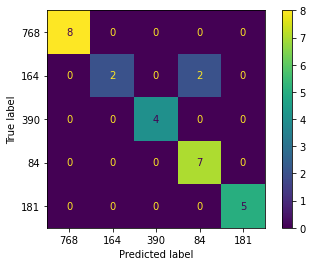

In [10]:
# Plot Confusion Matrix:
model.cm()

If you want to use just the feature extractor, you can check `poifreq` submodule:

In [ ]:
from matclassification.methods.feature.feature_extraction.pois import pois

sequences = [1,2,3]
features = ['poi']
method='npoi' # default: 'npoi', or, 'poi' and 'wnpoi'

x_train, x_test, y_train, y_test, _ = pois(train, test, sequences, features, method, 
                                           result_dir='./sample/results/pois', save_all=True) # And we save the results

display(x_train)

In [17]:
from matclassification.methods.feature.feature_extraction.pois import pois

sequences = [1]
features = ['poi']
method='npoi' # default: 'npoi', or, 'poi' and 'wnpoi'

x_train, x_test, y_train, y_test, _ = pois(train, test, sequences, features, method, 
                                           result_dir='./sample/results/pois', save_all=True) # And we save the results

display(x_train)

[POIS:] Starting feature extractor ... 
- Feature: poi, Sequence: 1
Starting NPOI...
[POIS:] Processing time: 85.184 milliseconds. Done.
------------------------------------------------------------------------------------------------


,0,1,2,3,4,5,6,7,8,9,...,570,571,572,573,574,575,576,577,578,579
0,0.024390,0.073171,0.048780,0.02439,0.024390,0.024390,0.024390,0.024390,0.048780,0.024390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.027778,0.037037,0.00000,0.009259,0.027778,0.009259,0.009259,0.037037,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.021505,0.000000,0.00000,0.000000,0.000000,0.000000,0.021505,0.000000,0.010753,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.020833,0.00000,0.000000,0.020833,0.020833,0.000000,0.041667,0.020833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.015385,0.046154,0.030769,0.00000,0.000000,0.000000,0.000000,0.015385,0.046154,0.046154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.017241,0.000000,0.00000,0.000000,0.000000,0.000000,0.017241,0.051724,0.034483,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.046512,0.023256,0.00000,0.000000,0.000000,0.000000,0.000000,0.046512,0.023256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.042553,0.021277,0.00000,0.000000,0.000000,0.000000,0.000000,0.042553,0.063830,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.015152,0.015152,0.060606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.057143,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


And then you can create the classifier (another way of using the classifier classes in the classical way):

In [7]:
from matclassification.methods.feature.POIS import POIS, prepareData

sequences = [1]
features = ['poi']

# POIS method have a method for data transformation:
num_features, num_classes, labels, X, y, one_hot_y = prepareData(x_train, x_test, y_train, y_test)
x_train, x_test = X
y_train, y_test = y

# Create the classifier:
model = POIS('npoi', sequences, features)

# Model Label Encoder:
model.le = one_hot_y

# You can add method variables with this:
model.add_config(num_features=num_features,
                num_classes=num_classes, 
                labels=labels)

# Run the classifier:
model.fit(x_train, y_train, x_test, y_test)

summary, y_pred = model.predict(x_test, y_test)


[NPOI:] Building model
===== Training Epoch 1 =====


2024-06-09 15:06:39.535141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-09 15:06:39.681270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 6ms/step
TRAIN		acc: 0.446429	acc_top5: 1.000000	f1_macro: 0.442836	prec_macro: 0.449610	rec_macro: 0.472727
1/1 [==============================] - 0s 11ms/step
TEST		acc: 0.464286	acc_top5: 1.000000	f1_macro: 0.412521	prec_macro: 0.411111	rec_macro: 0.442857
===== Training Epoch 2 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 0.750000	acc_top5: 1.000000	f1_macro: 0.742804	prec_macro: 0.748702	rec_macro: 0.789773
1/1 [==============================] - 0s 9ms/step
TEST		acc: 0.750000	acc_top5: 1.000000	f1_macro: 0.742634	prec_macro: 0.764286	rec_macro: 0.766429
===== Training Epoch 3 =====
2/2 [==============================] - 0s 2ms/step


2024-06-09 15:06:39.751124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


TRAIN		acc: 0.892857	acc_top5: 1.000000	f1_macro: 0.896732	prec_macro: 0.890620	rec_macro: 0.910065
1/1 [==============================] - 0s 9ms/step
TEST		acc: 0.857143	acc_top5: 1.000000	f1_macro: 0.858608	prec_macro: 0.900000	rec_macro: 0.875000
===== Training Epoch 4 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 0.964286	acc_top5: 1.000000	f1_macro: 0.963795	prec_macro: 0.961667	rec_macro: 0.969318
1/1 [==============================] - 0s 7ms/step
TEST		acc: 0.964286	acc_top5: 1.000000	f1_macro: 0.958095	prec_macro: 0.975000	rec_macro: 0.950000
===== Training Epoch 5 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 0.982143	acc_top5: 1.000000	f1_macro: 0.983580	prec_macro: 0.986667	rec_macro: 0.981818
1/1 [==============================] - 0s 7ms/step
TEST		acc: 0.964286	acc_top5: 1.000000	f1_macro: 0.958095	prec_macro: 0.975000	rec_macro: 0.950000
===== Training Epoch 6 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc

In [8]:
summary

,acc,acc_top_K5,balanced_accuracy,precision_macro,recall_macro,f1_macro
0,0.928571,1.0,0.9,0.908333,0.955556,0.9


The next classifiers use Hiperparameter Optimization (class derrived from `HPSClassifier`), thus we first call `model.train()` to test model configurations to look for the best model.

#### 2.1.3. DeepeST

TODO

In [7]:
from matclassification.methods import DeepeST

model = DeepeST()
model.prepare_input(train, test)
model.train()
model.test()

2024-06-14 15:03:42.252934

[DeepeST:] Building model

###########    DATA PREPARATION      ###########
Attribute 'space': 658 unique values
Attribute 'time': 879 unique values
Attribute 'day': 7 unique values
Attribute 'poi': 580 unique values
Attribute 'type': 198 unique values
Attribute 'root_type': 10 unique values
Attribute 'rating': 50 unique values
Attribute 'weather': 6 unique values
Attribute 'tid': 56 unique values
Total of attribute/value pairs: 2444


###########      DATA ENCODING        ###########

Input total: 2
... tid_0: 56
... tid_1: 28
col_name: ['space', 'time', 'day', 'poi', 'type', 'root_type', 'rating', 'weather', 'tid', 'label']...
... num_classes: 5
... max_lenght: 108
Removing column tid of attr
Removing column label of attr


#####   Encoding string data to integer   ######
   Encoding: space
   Encoding: time
   Encoding: day
   Encoding: poi
   Encoding: type
   Encoding: root_type
   Encoding: rating
   Encoding: weather


###########      Generating y_tr

[DeepeST:] Model Training:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000


2024-06-14 15:03:54.976070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-14 15:03:56.171970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-14 15:03:56.337977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-14 15:03:59.201413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-14 15:03:59.229252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 65.4945 - acc: 0.2679 - top_k_categorical_accuracy: 1.0000

2024-06-14 15:04:01.473363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-14 15:04:01.790132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-14 15:04:01.845732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 18s 18s/step - loss: 65.4945 - acc: 0.2679 - top_k_categorical_accuracy: 1.0000 - val_loss: 63.8971 - val_acc: 0.4643 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 1s 608ms/step - loss: 63.8943 - acc: 0.3929 - top_k_categorical_accuracy: 1.0000 - val_loss: 62.3297 - val_acc: 0.4286 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 321ms/step - loss: 62.3219 - acc: 0.3571 - top_k_categorical_accuracy: 1.0000 - val_loss: 60.7935 - val_acc: 0.4643 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 303ms/step - loss: 60.7923 - acc: 0.3750 - top_k_categorical_accuracy: 1.0000 - val_loss: 59.2907 - val_acc: 0.5000 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 337ms/step - loss: 59.2613 - acc: 0.3571 - top_k_categorical_accuracy: 1.0000 - val_loss: 57.8154 - val_acc: 0.

2024-06-14 15:04:33.774309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-14 15:04:34.049219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-14 15:04:34.068835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


KeyError: 'acc'

In [ ]:
model.summary()

#### 2.1.4. Trajectory Random Forrest (TRF)

TODO

In [ ]:
from matclassification.methods import TRF

model = TRF()
model.prepare_input(train, test)
model.train()
model.test()

In [ ]:
model.summary()

In [ ]:
model.cm()

#### 2.1.5. Trajectory XGBoost (TXGB)

TODO

In [ ]:
from matclassification.methods import TXGB

model = TXGB()
model.prepare_input(train, test)
model.train()
model.test()

In [ ]:
model.summary()

#### 2.1.6. BITULER

TODO

In [ ]:
from matclassification.methods import Bituler

model = Bituler()
model.prepare_input(train, test, features=['poi'])
model.train()
model.test()

In [ ]:
model.summary()

#### 2.1.7. TULVAE

TODO

In [ ]:
from matclassification.methods import Tulvae

model = Tulvae()
model.prepare_input(train, test, features=['poi'])
model.train()
model.test()

In [ ]:
model.summary()

### 2.2. Movelet Based Methods

Movelet base methods .... TODO

Let's start by extracting movelets from the train and test data, so we save the data:

In [ ]:
from matdata.converter import df2csv

data_path = 'sample/data/FoursquareNYC'

df2csv(train, data_path, 'train')
df2csv(test, data_path, 'test')
#test.to_csv('sample/data/FoursquareNYC/test.csv', index=False)

In [ ]:
from matdata.converter import df2parquet

data_path = 'sample/data/FoursquareNYC'

df2parquet(train, data_path, 'train')
df2parquet(test, data_path, 'test')

a) First, we can apply a method for movelets extraction like [HiPerMovelets](https://github.com/bigdata-ufsc/HiPerMovelets), for example configuration:

In [1]:
!java -Xmx7G -jar "./sample/programs/MoveletDiscovery.jar" \
-curpath "./sample/data/FoursquareNYC" \
-respath "./sample/results/hiper" \
-descfile "./sample/data/FoursquareNYC/FoursquareNYC.json" \
-nt 1 -version hiper -ms -1 -Ms -3 -TC 1d

Sun Jun 09 16:55:54 BRT 2024
log4j:WARN No appenders could be found for logger (org.apache.hadoop.util.Shell).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.
Starting Movelets +Log extractor 
Configurations:
   -curpath		Datasets directory:	./sample/data/FoursquareNYC
   -respath		Results directory: 	./sample/results/hiper/Movelets/HIPER_Log_FoursquareNYC_LSP_ED
   -descfile 		Description file : 	./sample/data/FoursquareNYC/FoursquareNYC.json
+-------------+--------------------+---------------------+----------------------------------------------+
| Option      | Description        | Value               | Help                                         |
+-------------+--------------------+---------------------+----------------------------------------------+
| -nt         | Allowed Threads    | 1                   |                                              |
| -ms         | Min size           |

b) Concatenate the feature files (created by label) containing the movelets matrix into one train.csv and one test.csv:

In [ ]:
!python3 scripts/helpers/MAT-MergeDatasets.py ./sample/results/hiper

In [ ]:
import pandas as pd
movelets_train = pd.read_csv('./sample/results/hiper/train.csv')
movelets_test = pd.read_csv('./sample/results/hiper/test.csv')

Next, let's use the movelets for classification ...

#### 2.2.1. Movelet Multi-Layer Perceptron (MMLP)

TODO

*In this case we don´t need `model.train()` to train models for finding the best configuration parameters. Because the model use movelets, those are already the most discriminant patterns in data. Thus, the neural network was already tunned to this type of input.

In [ ]:
from matclassification.methods import MMLP

model = MMLP()
model.prepare_input(movelets_train, movelets_test)
model.train() 
model.test()

In [ ]:
model.summary()

In [ ]:
model.cm()

In [ ]:
# This is another version, without hiper-parameter search:
from matclassification.methods.feature.MoveletMLP import MMLP1

model = MMLP1()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()
model.summary()

#### 2.2.2. Movelet Random Forrest (MRF)

TODO

In [ ]:
from matclassification.methods import MRF

model = MRF()
model.prepare_input(movelets_train, movelets_test)
model.train() 
model.test()

In [ ]:
model.summary()

In [ ]:
model.cm()

#### 2.2.3. Movelet Random Forrest with HiperParameter Search (MRFHP)

TODO

In [ ]:
from matclassification.methods import MRFHP

model = MRFHP()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()

In [ ]:
model.summary()

#### 2.2.4. Movelet Support Vector Machine (MSCV)

TODO

In [ ]:
from matclassification.methods import MSVC

model = MSVC()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()

In [ ]:
model.summary()

#### 2.2.5. Movelet Decision Tree (MDT)

TODO

In [ ]:
from matclassification.methods import MDT

model = MDT()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()

In [ ]:
model.summary()

In [ ]:
fig = model.plot_tree()

In [ ]:
model.graph_tree()

---
## 3. Scripts

The scripts provided with this package for using some of the library functions in command line environment.

### 3.1. Classifications Methods

In [ ]:
# Only the MARC classifier:
!python3 scripts/cls/MARC.py 'sample/data/FoursquareNYC/train.csv' 'sample/data/FoursquareNYC/test.csv' 'sample/results'

In [1]:
!python3 scripts/cls/MAT-TC.py --help

usage: MAT-MC.py [-h] [-c CLASSIFIERS] [-m MODELFOLDER] [-r RANDOM]
                 results-path

MAT Movelets Classification

positional arguments:
  results-path          path for the results folder

optional arguments:
  -h, --help            show this help message and exit
  -c CLASSIFIERS, --classifiers CLASSIFIERS
                        classifiers methods
  -m MODELFOLDER, --modelfolder MODELFOLDER
                        model folder
  -r RANDOM, --random RANDOM
                        random seed


In [ ]:
# Methods for trajectory input (includes MARC):
!python3 scripts/cls/MAT-TC.py 'sample/data/FoursquareNYC' 'sample/results' -c 'TRF,TXGB,Tulvae,Bituler,MARC,DeepeST'

In [ ]:
# Methods for movelets input:
!python3 scripts/cls/MAT-MC.py 'sample/results/hiper' -c 'MDT,MMLP,MRF,MSVC,MRFHP'

In [ ]:
# For POI-S classification of sequence sizes concatenated (it does feature extraction):
!python3 scripts/cls/POIS-TC.py 'sample/data/FoursquareNYC' 'sample/results'

In [22]:
# For POI-S for feature extraction:
!python3 scripts/features/POIS.py 'sample/data/FoursquareNYC' 'sample/results/NPOI_poi_1_2_3'

[POIS:] Starting feature extractor ... 
- Feature: poi, Sequence: 1
Starting NPOI...
- Feature: poi, Sequence: 2
Starting NPOI...
- Feature: poi, Sequence: 3
Starting NPOI...
[POIS:] Processing time: 341.25100000000003 milliseconds. Done.
------------------------------------------------------------------------------------------------
Done. Processing time: 373.722 milliseconds
# ---------------------------------------------------------------------------------


In [23]:
# Optionally, for POI-S feature extraction AND classification (it classify each sequence size alone and all sizes concatenated):
!python3 scripts/features/POIS.py 'sample/data/FoursquareNYC' 'sample/results/NPOI_poi_1_2_3' --classify

[POIS:] Starting feature extractor ... 
- Feature: poi, Sequence: 1
Starting NPOI...
- Feature: poi, Sequence: 2
Starting NPOI...
- Feature: poi, Sequence: 3
Starting NPOI...
[POIS:] Processing time: 345.931 milliseconds. Done.
------------------------------------------------------------------------------------------------

[NPOI:] Building model
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

2024-06-11 22:50:03.104851: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-11 22:50:03.104944: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-06-11 22:50:03.205226: W tensorflow/core/platform/profil

### 3.3. Helpers for Experimental Results:

In [23]:
!python3 scripts/helpers/MAT-MergeDatasets.py /Users/tarlisportela/Downloads/sample/results/HpL

Loading files - train.csv
Writing train.csv file
Done.
Loading files - test.csv
Writing test.csv file
Done.


b) Concatenate the feature files (created by label) containing the movelets matrix into one train.csv and one test.csv:

In [2]:
!python3 scripts/helpers/MAT-MergeDatasets.py ./sample/results/hiper

Loading files - train.csv
Writing train.csv file
Done.
Loading files - test.csv
Writing test.csv file
Done.


In [6]:
!python3 scripts/helpers/MAT-Summary.py ./sample/results/hiper

Done.


In [21]:
import os
import glob2 as glob
def getResultFiles(res_path, patterns = []):
    def findFiles(x):
        search = os.path.join(res_path, '**', x)
        return list(glob.glob(search, recursive=True))
#        fl = []
#        for files in glob.glob(search, recursive=True):
#            fileName, fileExtension = os.path.splitext(files)
#            fl.append(files) #filename with extension
#        return fl
       
    filesList = sum(list(map(lambda p: findFiles(p), patterns)), [])

    # Second add the remaining:
#    filesList = filesList + findFiles('model_*_summary.csv') # NN / RF / SVM
#    filesList = filesList + findFiles('*-*.txt') # NN / RF / SVM
#    filesList = filesList + findFiles('classification_times.csv') # NN / RF / SVM
#    filesList = filesList + findFiles('poifreq_results.txt') # POI-F / POI-FS
#    #filesList = filesList + findFiles('MARC-*.txt') # MARC
#    filesList = filesList + findFiles('model_approachEnsemble_history.csv') # TEC
#    filesList = filesList + findFiles('TEC*/*.txt') # TEC
    
    filesList = list(set(filesList))
    
    filesList = list(filter(lambda file: 'POI' not in os.path.basename(file).split('-')[0], filesList))
    
    filesList.sort()
    
    return filesList

getResultFiles('sample/results', ['model_*_summary.csv', 'model_*_history.csv'])

['sample/results/hiper/model/model_mdt_summary.csv',
 'sample/results/hiper/model/model_mmlp_history.csv',
 'sample/results/hiper/model/model_mmlp_summary.csv',
 'sample/results/hiper/model/model_mrf_summary.csv',
 'sample/results/hiper/model/model_mrfhp_history.csv',
 'sample/results/hiper/model/model_mrfhp_summary.csv',
 'sample/results/hiper/model/model_msvc_summary.csv']

In [18]:
from matview.scripting.component._base import BaseMethod

#dict(map(lambda cls: (cls.__name__, cls), BaseMethod.__subclasses__()))
BaseMethod.__subclasses__()

ModuleNotFoundError: No module named 'matview'

---
# Extras

I) if we want to read and prepare the movelets feature matrix splitting into: train, validation and text sets:

In [ ]:
import pandas as pd

# Splitting the train data into train and validation 
df_train = pd.read_csv('./sample/results/train.csv')
df_train['tid'] = df_train.index

from matdata.preprocess import trainAndTestSplit
df_train, df_val = trainAndTestSplit(df_train, train_size=0.75, tid_col='tid', class_col='class', outformats=[])
df_train.drop(columns=['tid'], inplace=True)
df_val.drop(columns=['tid'], inplace=True)

df_train.to_csv('sample/results/train_1.csv', index=False)
df_val.to_csv('sample/results/train_2.csv', index=False)

In [ ]:
# Reading the movelet data:
from matclassification.methods import read_features_csv
X_train, y_train = read_features_csv('./sample/results', 'train_1.csv')
X_val, y_val = read_features_csv('./sample/results', 'train_2.csv')
X_test, y_test = read_features_csv('./sample/results', 'test.csv')

And, use it in a classifier:

In [ ]:
from matclassification.methods import MDT

model = MDT()
model.fit(X_train, y_train, X_val, y_val)
model.predict(X_test, y_test)

model.summary()

---
### That's all, thanks!

\# By Tarlis Portela (2023)